<a href="https://colab.research.google.com/github/ChristianEngProd/HTML_Teste/blob/main/Primeiros_Passos_Christian_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda

**Tópicos**:

* Revisão de Python:
 - Variáveis
 - Operações Matemáticas

* Exercício Prático (Hands on)

* Carregamento dos dados

* Visualizações

# Revisão de Python

## Variáveis

Uma variável é um objeto que guarda um valor e armazena esse valor na memória do computador durante o tempo de desenvolvimento. Podemos inicializar uma variável por meio do comando de atribuição '='.

In [ ]:
# podemos definir uma variável dando um nome
ano = 2020

In [ ]:
# para imprimir a variável criada, utilizamos a função print
print(ano)

2020


In [ ]:
salario = 1500
print(salario)
salario = 1000
print(salario)


1500
1000


## Operações Matemáticas

Com Python podemos realizar operações matemáticas. Com o uso das variáveis isso fica ainda mais poderoso.

In [ ]:
salario1 = 1500
salario2 = 1000

In [ ]:
print(salario1 + salario2) #soma
print(salario1 - salario2) #subtração
print(salario1 * salario2) #multiplicação
print(salario1 / salario2) #divisão
print(salario1 // salario2) #divisão inteira
print(salario1 % salario2) #resto da divisão
print(salario1 ** 2) #exponenciação

2500
500
1500000
1.5
1
500
2250000


# Exercício Prático (Hands on)

* 1. Abrir Google Colab: https://colab.research.google.com/
* 2. Login na conta Google
* 3. Arquivo --> Novo notebook

# Carregamento dos dados

In [ ]:
#Biblioteca Pandas
import pandas as pd

In [ ]:
#Carregando bases de dados de Jan22 a Mar22
#Fonte: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

etanol_202201 = pd.read_csv('https://github.com/marioandrededeus/semana_sala_aberta_DH/raw/main/precos-gasolina-etanol-2022-01.csv', sep = ';', decimal = ',', encoding = 'latin')
etanol_202202 = pd.read_csv('https://github.com/marioandrededeus/semana_sala_aberta_DH/raw/main/precos-gasolina-etanol-2022-02.csv', sep = ';', decimal = ',', encoding = 'latin')
etanol_202203 = pd.read_csv('https://github.com/marioandrededeus/semana_sala_aberta_DH/raw/main/dados-abertos-precos-2022-03-gasolina-etanol.csv', sep = ';', decimal = ',', encoding = 'latin')

df = pd.concat([etanol_202201, etanol_202202, etanol_202203])
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], dayfirst=True)
df.head()

,Regiao,Estado,Municipio,Produto,Data da Coleta,Valor de Venda
0,N,AC,RIO BRANCO,GASOLINA,2022-01-03,6.99
1,N,AC,RIO BRANCO,ETANOL,2022-01-03,5.99
2,N,AC,RIO BRANCO,GASOLINA ADITIVADA,2022-01-03,7.05
3,N,AC,RIO BRANCO,GASOLINA,2022-01-03,6.99
4,N,AC,RIO BRANCO,ETANOL,2022-01-03,6.12


## Dimensões do dataframe (tabela)

In [ ]:
df.shape

(165945, 6)

# Visualizações

## Preço por Estado

In [ ]:
df_estado = df.groupby('Estado')['Valor de Venda'].mean()
df_estado

Estado
AC    6.970001
AL    6.314668
AM    6.500300
AP    5.999574
BA    6.542584
CE    6.506086
DF    6.510057
ES    6.609645
GO    6.221585
MA    6.533369
MG    6.351903
MS    6.211182
MT    5.830462
PA    6.919653
PB    6.105868
PE    6.216960
PI    6.740605
PR    6.105763
RJ    6.923990
RN    6.677700
RO    6.829194
RR    6.612073
RS    6.616741
SC    6.514957
SE    6.311125
SP    5.841157
TO    6.639260
Name: Valor de Venda, dtype: float64

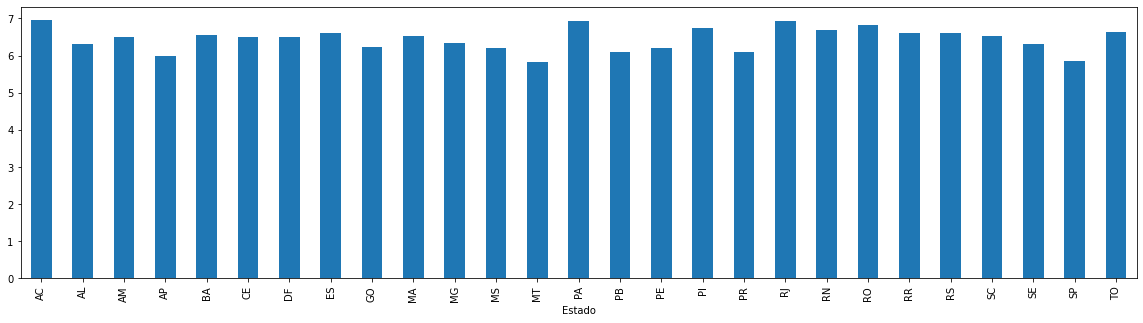

In [ ]:
df_estado.plot.bar(figsize = (20,5));

## Preço por Regiao

In [ ]:
df_regiao = df.groupby('Regiao')['Valor de Venda'].mean()
df_regiao

Regiao
CO    6.133113
N     6.754050
NE    6.452099
S     6.389886
SE    6.117646
Name: Valor de Venda, dtype: float64

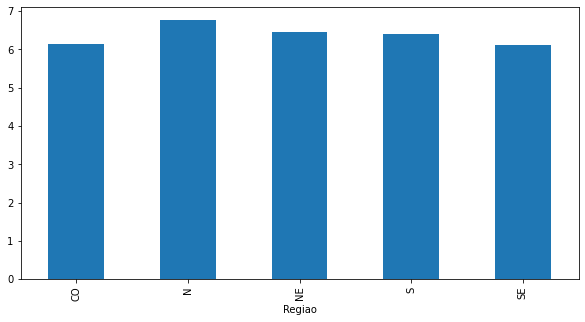

In [ ]:
df_regiao.plot.bar(figsize = (10,5));

## Preço por Região - Linha do Tempo

In [ ]:
df_regiao_data = df.groupby(['Regiao','Data da Coleta'])['Valor de Venda'].mean().reset_index()
df_regiao_data

,Regiao,Data da Coleta,Valor de Venda
0,CO,2022-01-03,6.100776
1,CO,2022-01-04,6.148518
2,CO,2022-01-05,6.029087
3,CO,2022-01-06,5.999943
4,CO,2022-01-10,6.075419
...,...,...,...
292,SE,2022-03-25,6.445915
293,SE,2022-03-28,6.438948
294,SE,2022-03-29,6.481939
295,SE,2022-03-30,6.386642


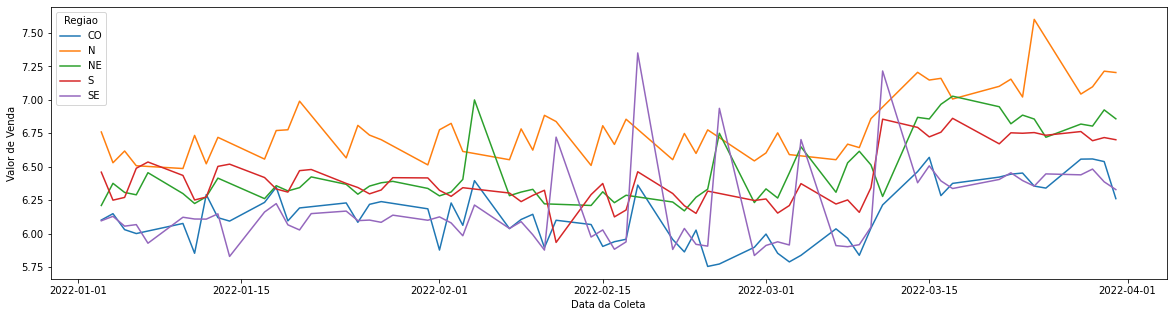

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))
sns.lineplot(data = df_regiao_data, 
             x = 'Data da Coleta', 
             y = 'Valor de Venda', 
             hue = 'Regiao');
